In [1]:
import pandas as pd
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

In [2]:
iris.shape

(150, 6)

In [3]:
iris.head

<bound method NDFrame.head of       id  sepal_len  sepal_wd  petal_len  petal_wd         species
0      0        5.1       3.5        1.4       0.2     iris-setosa
1      1        4.9       3.0        1.4       0.2     iris-setosa
2      2        4.7       3.2        1.3       0.2     iris-setosa
3      3        4.6       3.1        1.5       0.2     iris-setosa
4      4        5.0       3.6        1.4       0.2     iris-setosa
..   ...        ...       ...        ...       ...             ...
145  145        6.7       3.0        5.2       2.3  iris-virginica
146  146        6.3       2.5        5.0       1.9  iris-virginica
147  147        6.5       3.0        5.2       2.0  iris-virginica
148  148        6.2       3.4        5.4       2.3  iris-virginica
149  149        5.9       3.0        5.1       1.8  iris-virginica

[150 rows x 6 columns]>

In [4]:
iris.head()

,id,sepal_len,sepal_wd,petal_len,petal_wd,species
0,0,5.1,3.5,1.4,0.2,iris-setosa
1,1,4.9,3.0,1.4,0.2,iris-setosa
2,2,4.7,3.2,1.3,0.2,iris-setosa
3,3,4.6,3.1,1.5,0.2,iris-setosa
4,4,5.0,3.6,1.4,0.2,iris-setosa


In [5]:
iris.drop('id',axis=1,inplace=True)
iris.head()

,sepal_len,sepal_wd,petal_len,petal_wd,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


In [6]:
iris.describe()

,sepal_len,sepal_wd,petal_len,petal_wd
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:

iris[['petal_len','petal_wd']].describe()

,petal_len,petal_wd
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [8]:
iris.groupby('species').size()

species
iris-setosa        50
iris-versicolor    50
iris-virginica     50
dtype: int64

In [9]:
iris['species'].value_counts()

iris-versicolor    50
iris-virginica     50
iris-setosa        50
Name: species, dtype: int64

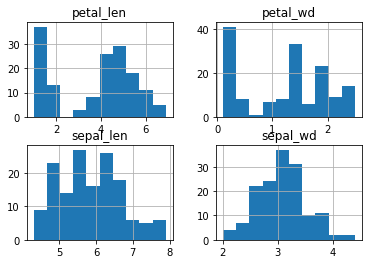

In [12]:
import matplotlib.pyplot as plt
iris.hist()
plt.show()

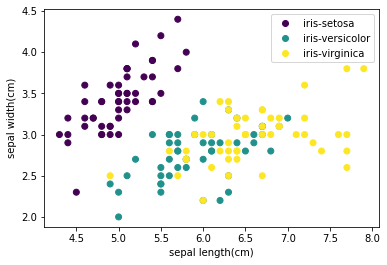

In [14]:
#build a dict mapping species to an integer code
inv_name_dict = {'iris-setosa':0,
                'iris-versicolor':1,
                'iris-virginica':2}
#build integer color code 0/1/2
colors=[inv_name_dict[item] for item in iris['species']]
#scatter plot
scatter = plt.scatter(iris['sepal_len'],iris['sepal_wd'],c=colors)
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
## add legend
plt.legend(handles=scatter.legend_elements()[0],
          labels = inv_name_dict.keys())
plt.show()

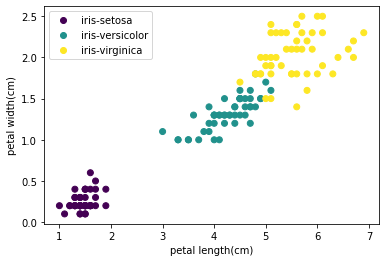

In [15]:
#scatter plot
scatter = plt.scatter(iris['petal_len'],iris['petal_wd'],c=colors)
plt.xlabel('petal length(cm)')
plt.ylabel('petal width(cm)')
#add legend
plt.legend(handles = scatter.legend_elements()[0],labels = inv_name_dict.keys())
plt.show()

In [25]:
pandas.plotting.scatter_matrix()

NameError: name 'pandas' is not defined

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
X=iris[['petal_len','petal_wd']]
y=iris['species']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1,stratify=y)
y_train.value_counts()
y_test.value_counts()

iris-virginica     15
iris-versicolor    15
iris-setosa        15
Name: species, dtype: int64

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
#predict() returns an array of predicted class labels for the predictor data.
pred=knn.predict(X_test)


In [61]:
pred[:5]

array(['iris-virginica', 'iris-setosa', 'iris-setosa', 'iris-versicolor',
       'iris-versicolor'], dtype=object)

In [62]:
pred[10:12]

array(['iris-setosa', 'iris-virginica'], dtype=object)

In [63]:
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob[10:12]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

In [70]:
y_pred = knn.predict(X_test)
(y_pred==y_test.values).sum()
y_test.size

45

In [40]:
#In classification tasks, soft prediction returns the predicted probabilities of data points belonging to each of the classes.
#while hard prediction outputs the labels only.

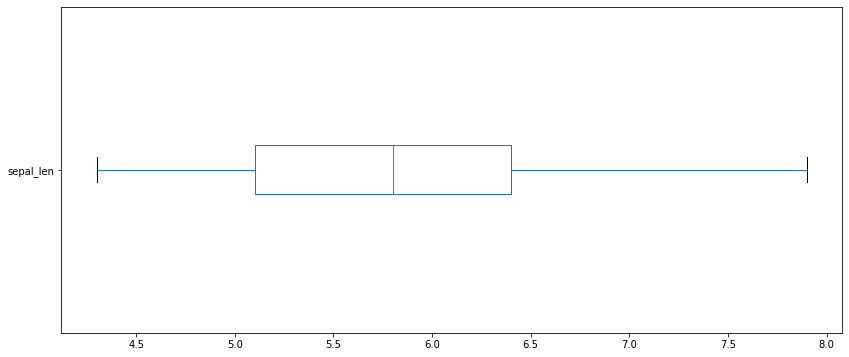

In [41]:
iris['sepal_len'].plot(kind='box', vert=False, figsize=(14,6))

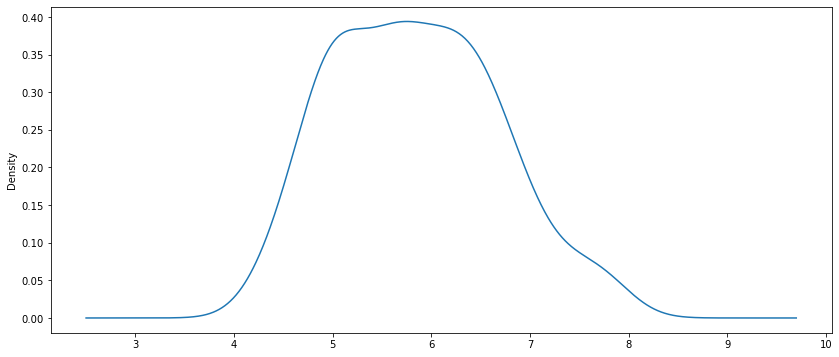

In [42]:
iris['sepal_len'].plot(kind='density', figsize=(14,6))

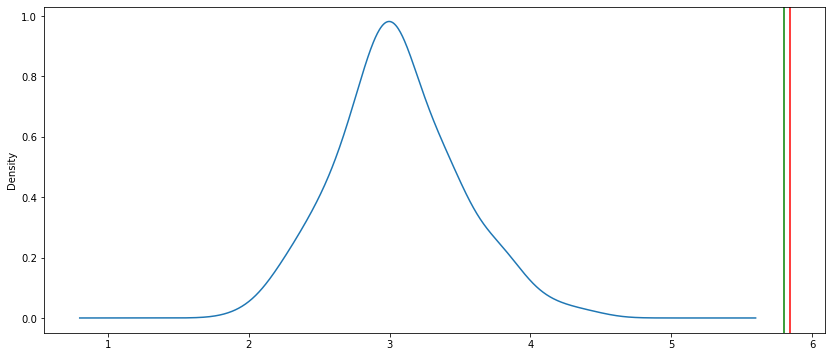

In [44]:
ax = iris['sepal_wd'].plot(kind='density', figsize=(14,6))
ax.axvline(iris['sepal_len'].mean(), color='red')
ax.axvline(iris['sepal_len'].median(), color='green')

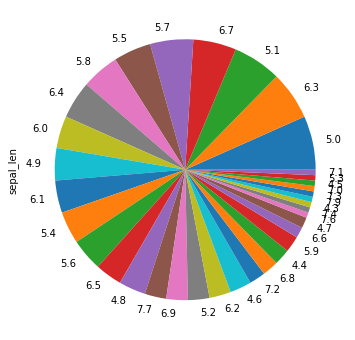

In [45]:
iris['sepal_len'].value_counts().plot(kind='pie', figsize=(6,6))

In [48]:
corr = iris.corr()
corr

,sepal_len,sepal_wd,petal_len,petal_wd
sepal_len,1.000000,-0.117570,0.871754,0.817941
sepal_wd,-0.117570,1.000000,-0.428440,-0.366126
petal_len,0.871754,-0.428440,1.000000,0.962865
petal_wd,0.817941,-0.366126,0.962865,1.000000


In [52]:
%matplotlib inline

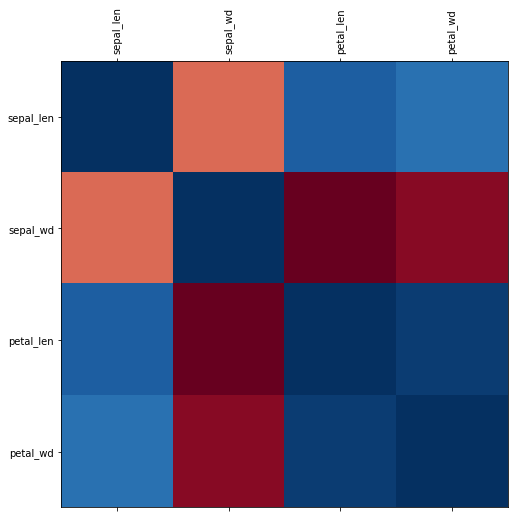

In [53]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [71]:
y_pred = knn.predict(X_test)
(y_pred==y_test.values).sum()/y_test.size

0.9777777777777777

In [72]:
knn.score(X_test,y_test)

0.9777777777777777

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred,labels=['iris-setosa',
                                      'iris-versicolor','iris-virginica'])

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

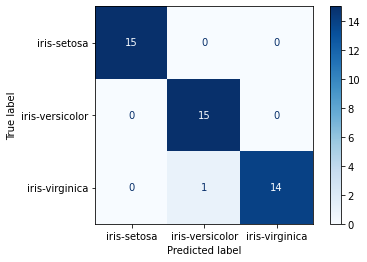

In [74]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues);

In [75]:
import numpy as np
y_true = np.array(['dog', 'cat', 'cat', 'dog', 'dog'])
y_pred = np.array(['dog', 'cat', 'cat', 'cat', 'dog'])

confusion_matrix(y_true, y_pred, labels=['cat', 'dog'])

array([[2, 0],
       [1, 2]], dtype=int64)

In [76]:
from sklearn.model_selection import cross_val_score
knn_cv=KNeighborsClassifier(n_neighbors=3)
cv_scores=cross_val_score(knn_cv,X,y,cv=5)
cv_scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [77]:
cv_scores.mean()

0.9533333333333334

In [78]:
#using grid search to find the optimal hyperparameter(k) for our model
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(2,10)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X,y)
knn_gscv.best_params_

{'n_neighbors': 4}

In [79]:
knn_gscv.best_score_

0.9666666666666668

In [80]:
knn_final = KNeighborsClassifier(n_neighbors = knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X,y)
y_pred=knn_final.predict(X)
knn_final.score(X,y)

0.9733333333333334

In [87]:
import numpy as np
import pandas as pd
new_data=np.array([3.76,1.20])
#knn_final.predict(np.array(new_data))
new_data=new_data.reshape(1,-1)
knn_final.predict(new_data)

array(['iris-versicolor'], dtype=object)

In [88]:
new_data = np.array([[3.76,1.2],[5.25,1.2],[1.58,1.2]])
knn_final.predict(new_data)
knn_final.predict_proba(new_data)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ]])

In [89]:

import numpy as np
from sklearn.metrics import confusion_matrix 
y_true = np.array(['cat', 'dog', 'dog',
  'cat', 'fish', 'dog', 'fish'])
y_pred = np.array(['cat', 'cat', 'cat',
  'cat', 'fish', 'dog', 'fish'])
confusion_matrix(y_true, y_pred,
  labels=['cat', 'dog', 'fish'])

array([[2, 0, 0],
       [2, 1, 0],
       [0, 0, 2]], dtype=int64)